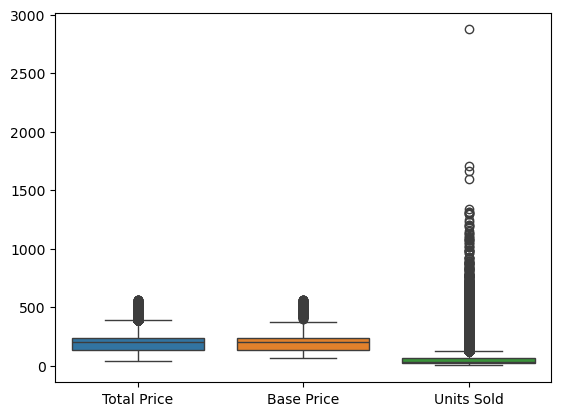

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 15, 'learning_rate': 0.05, 'colsample_bytree': 0.6}

 XGBoost Model -- MSE: 1268.13, RMSE: 35.61, R²: 0.467


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("PRODUCT DEMAND PREDICTION 17.csv")

# Feature Engineering 
df['Price_Diff'] = df['Base Price'] - df['Total Price']
df['Price_Ratio'] = df['Total Price'] / (df['Base Price'] + 1e-6)  

# visualize outliers
sns.boxplot(data=df[['Total Price', 'Base Price', 'Units Sold']])
plt.show()

# Handle Outliers 
cap_value = df['Units Sold'].quantile(0.99)
df['Units Sold'] = np.where(df['Units Sold'] > cap_value, cap_value, df['Units Sold'])

# Feature Selection 
features = ['Store ID', 'Total Price', 'Base Price', 'Price_Ratio']
target = 'Units Sold'

X = df[features]
y = df[target]

# Train-Test Split
train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

#TimeSeriesSplit Cross-Validation 
tscv = TimeSeriesSplit(n_splits=5)

# XGBoost Hyperparameter Tuning 
xgb = XGBRegressor(random_state=42)

param_distributions = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_distributions,
    n_iter=30,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Model Training
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)

#  Model Evaluation 
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\n XGBoost Model -- MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.3f}")


Dataset shape: (6362620, 11)

Data types:
 step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

Missing values per column:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Summary statistics:
                step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04

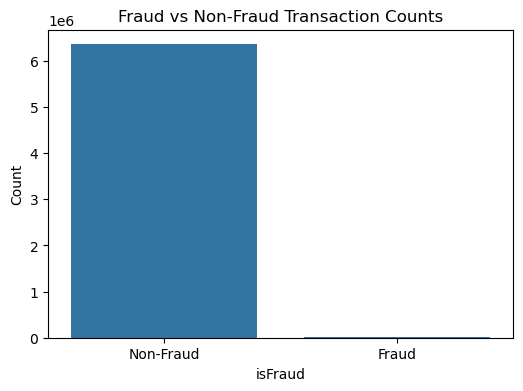


Transaction types count:
 type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

Fraudulent transactions by type:
 type
CASH_IN        0
CASH_OUT    4116
DEBIT          0
PAYMENT        0
TRANSFER    4097
Name: isFraud, dtype: int64

Fraud rate (%) by transaction type:
 type
CASH_IN     0.000000
CASH_OUT    0.183955
DEBIT       0.000000
PAYMENT     0.000000
TRANSFER    0.768799
Name: isFraud, dtype: float64


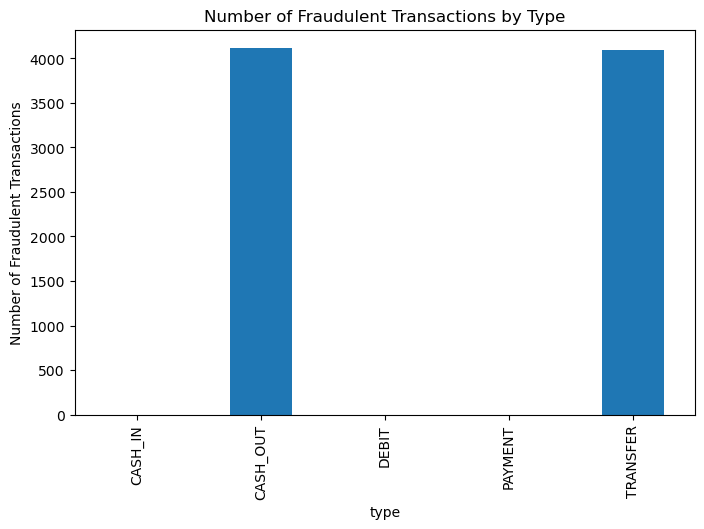

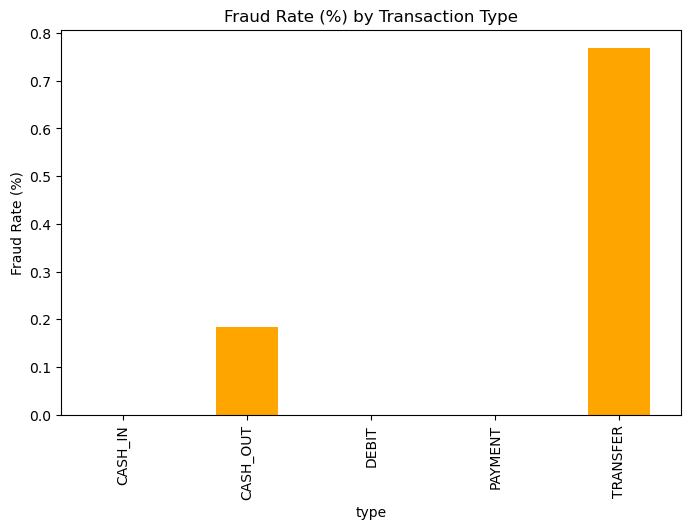

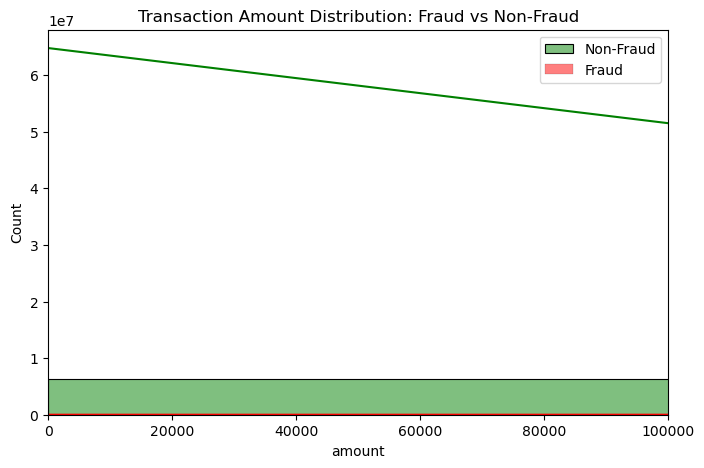

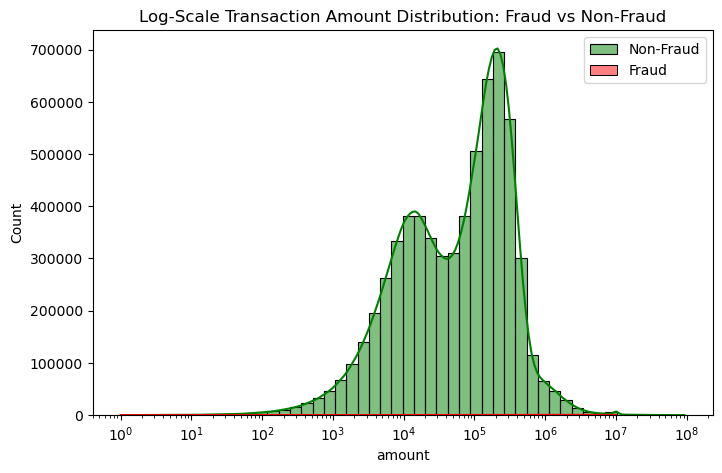

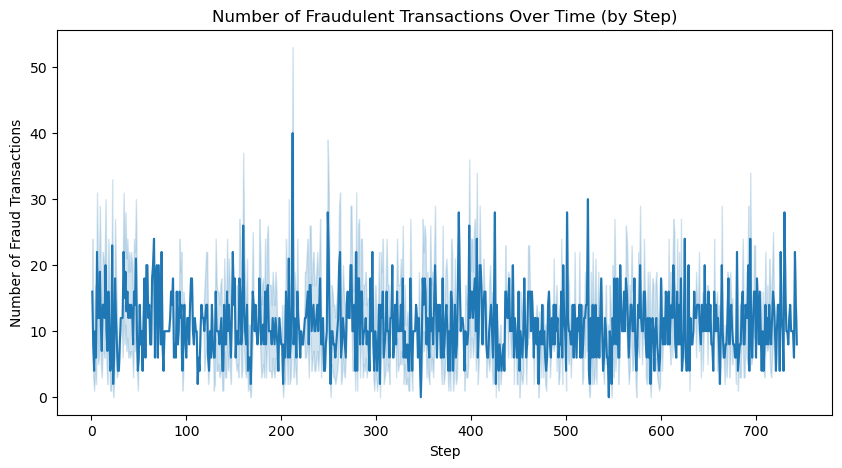

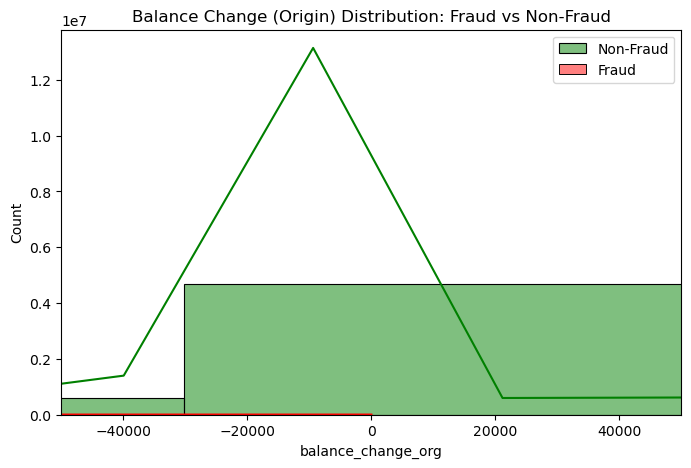

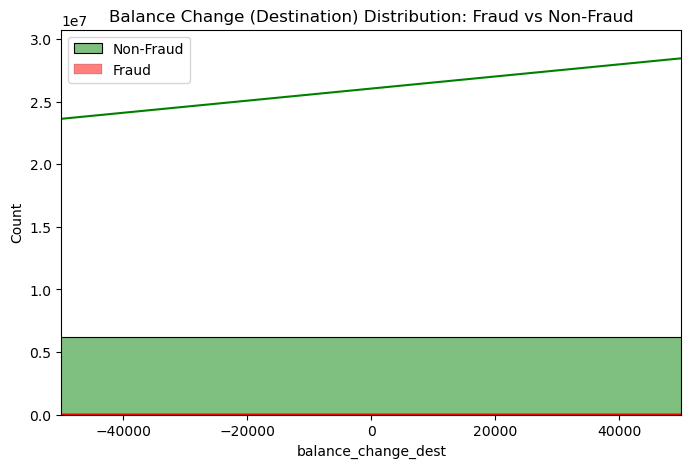


Flagged Fraud distribution:
 isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

Flagged fraud among actual fraud cases: 16


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
payment = pd.read_csv("ONLINE PAYMENTS FRAUD DETECTION 1.csv")

# 1. Dataset shape and data types
print("Dataset shape:", payment.shape)
print("\nData types:\n", payment.dtypes)

# 2. Check for missing values
print("\nMissing values per column:\n", payment.isnull().sum())

# 3. Summary statistics for numeric columns
print("\nSummary statistics:\n", payment.describe())

# 4. Distribution of fraud vs non-fraud
fraud_counts = payment['isFraud'].value_counts()
print("\nFraud distribution:\n", fraud_counts)

# Plot fraud distribution
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.xticks([0,1], ['Non-Fraud', 'Fraud'])
plt.title('Fraud vs Non-Fraud Transaction Counts')
plt.ylabel('Count')
plt.show()

# 5. Transaction types count and fraud distribution among them
type_counts = payment['type'].value_counts()
print("\nTransaction types count:\n", type_counts)

# Fraud count per transaction type
fraud_by_type = payment.groupby('type')['isFraud'].sum()
print("\nFraudulent transactions by type:\n", fraud_by_type)

# Fraud rate (%) by transaction type
fraud_rate_by_type = payment.groupby('type')['isFraud'].mean() * 100
print("\nFraud rate (%) by transaction type:\n", fraud_rate_by_type)

# Plot fraud count by transaction type
plt.figure(figsize=(8,5))
fraud_by_type.plot(kind='bar')
plt.title('Number of Fraudulent Transactions by Type')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

# Plot fraud rate by transaction type
plt.figure(figsize=(8,5))
fraud_rate_by_type.plot(kind='bar', color='orange')
plt.title('Fraud Rate (%) by Transaction Type')
plt.ylabel('Fraud Rate (%)')
plt.show()

# 6. Transaction Amount distribution for fraud vs non-fraud (linear scale)
plt.figure(figsize=(8,5))
sns.histplot(payment[payment['isFraud'] == 0]['amount'], color='green', label='Non-Fraud', bins=50, kde=True)
sns.histplot(payment[payment['isFraud'] == 1]['amount'], color='red', label='Fraud', bins=50, kde=True)
plt.legend()
plt.title('Transaction Amount Distribution: Fraud vs Non-Fraud')
plt.xlim(0, 100000)  # limit x-axis for better visualization
plt.show()

# 7. Transaction Amount distribution (log scale) - add 1 to avoid log(0)
plt.figure(figsize=(8,5))
sns.histplot(payment[payment['isFraud'] == 0]['amount'] + 1, color='green', label='Non-Fraud', bins=50, kde=True, log_scale=True)
sns.histplot(payment[payment['isFraud'] == 1]['amount'] + 1, color='red', label='Fraud', bins=50, kde=True, log_scale=True)
plt.legend()
plt.title('Log-Scale Transaction Amount Distribution: Fraud vs Non-Fraud')
plt.show()

# 8. Fraudulent transactions over time (step)
plt.figure(figsize=(10,5))
sns.lineplot(data=payment, x='step', y='isFraud', estimator='sum')
plt.title('Number of Fraudulent Transactions Over Time (by Step)')
plt.xlabel('Step')
plt.ylabel('Number of Fraud Transactions')
plt.show()

# 9. Balance changes and comparison between fraud and non-fraud

# Calculate balance changes
payment['balance_change_org'] = payment['newbalanceOrig'] - payment['oldbalanceOrg']
payment['balance_change_dest'] = payment['newbalanceDest'] - payment['oldbalanceDest']

# Plot balance change origin for fraud vs non-fraud
plt.figure(figsize=(8,5))
sns.histplot(payment[payment['isFraud'] == 0]['balance_change_org'], color='green', label='Non-Fraud', bins=50, kde=True)
sns.histplot(payment[payment['isFraud'] == 1]['balance_change_org'], color='red', label='Fraud', bins=50, kde=True)
plt.legend()
plt.title('Balance Change (Origin) Distribution: Fraud vs Non-Fraud')
plt.xlim(-50000, 50000)
plt.show()

# Plot balance change destination for fraud vs non-fraud
plt.figure(figsize=(8,5))
sns.histplot(payment[payment['isFraud'] == 0]['balance_change_dest'], color='green', label='Non-Fraud', bins=50, kde=True)
sns.histplot(payment[payment['isFraud'] == 1]['balance_change_dest'], color='red', label='Fraud', bins=50, kde=True)
plt.legend()
plt.title('Balance Change (Destination) Distribution: Fraud vs Non-Fraud')
plt.xlim(-50000, 50000)
plt.show()

# 10. Check 'isFlaggedFraud' distribution
flagged_fraud_counts = payment['isFlaggedFraud'].value_counts()
print("\nFlagged Fraud distribution:\n", flagged_fraud_counts)
print("\nFlagged fraud among actual fraud cases:", payment[payment['isFraud'] == 1]['isFlaggedFraud'].sum())


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# Encode 'type' using one-hot encoding
cat_features = ['type']
num_features = ['amount', 'balance_change_org', 'balance_change_dest', 'step']

# Create log amount feature
payment['amount_log'] = np.log1p(payment['amount'])

# Define feature matrix and target
X = payment[cat_features + ['amount_log', 'balance_change_org', 'balance_change_dest', 'step']]
y = payment['isFraud']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [4]:
from sklearn.ensemble import RandomForestClassifier

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough'  # keep numerical features as is
)

# Create pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])

# Train model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.97      0.74      0.84      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.87      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524

ROC AUC: 0.9468648174663302
